In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
Default = pd.read_csv("../../datasets/Default_Fin.csv")

In [3]:
Default.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
Default.shape

(10000, 5)

In [5]:
Default.rename(columns = {"Defaulted?":"defaulted"}, inplace = True)

In [6]:
Default.head()

,Index,Employed,Bank Balance,Annual Salary,defaulted
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [7]:
#Checking the numerical columns
Default.describe()

,Index,Employed,Bank Balance,Annual Salary,defaulted
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [8]:
#lets do "Univariate Analysis"  which will show use how two columns value vary with eachother

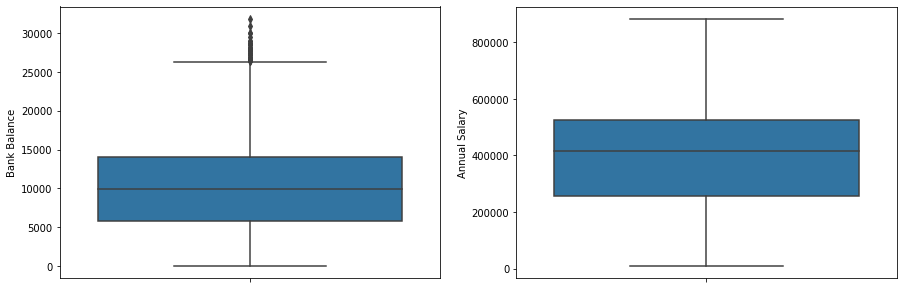

In [9]:
#boxplot will show us 5 number summary value min.value max.value 25% and 50% 70%
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y = Default['Bank Balance'])

plt.subplot(1,2,2)
sns.boxplot(y = Default['Annual Salary'])
plt.show()
           

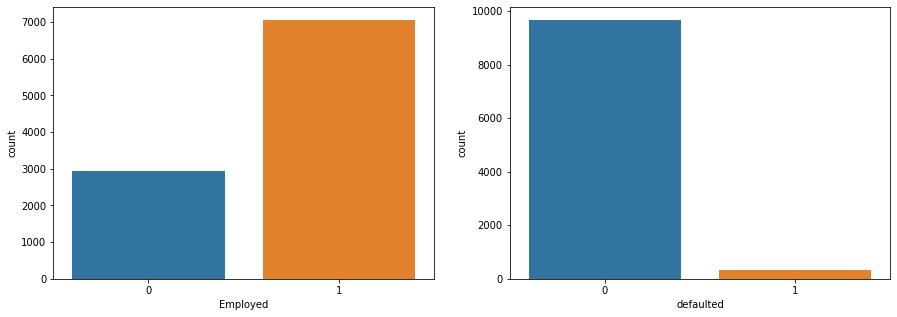

In [10]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(Default['Employed'])

plt.subplot(1,2,2)
sns.countplot(Default['defaulted'])
plt.show()
#we can see that 3000 are not employed while 7000 are employed 
#here"0" is for "no" while "1" is for "yes"
# so in the second plot we saw very few employed are default while other can repay or not defaulted

In [11]:
#Checking exact value in each figure

In [12]:
#lets see the exact value
Default["Employed"].value_counts()
#here we saw that exactly "7056" are employed while "2944" are "unemployed"

1    7056
0    2944
Name: Employed, dtype: int64

In [13]:
Default["defaulted"].value_counts()
#we see that "9667"employee are not deafaulted while only "333" are defaulted

0    9667
1     333
Name: defaulted, dtype: int64

In [14]:
#'checking Percentage '

In [15]:
Default["Employed"].value_counts(normalize = True)

1    0.7056
0    0.2944
Name: Employed, dtype: float64

In [16]:
#lets do "bivariate Analysis"  which will show use how two columns value vary with eachother

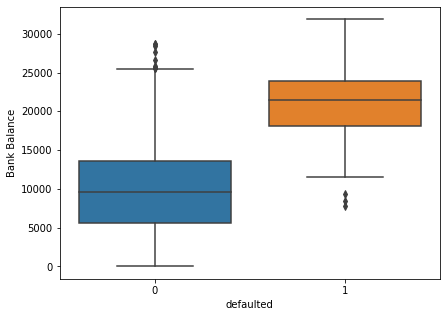

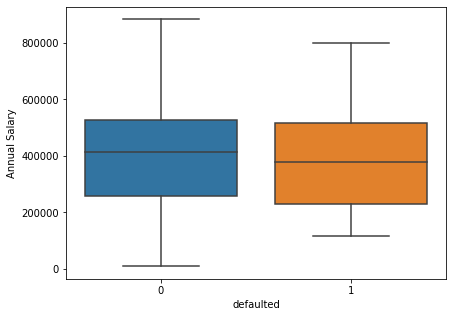

In [17]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(Default['defaulted'],Default['Bank Balance'])
#we saw in plot which is not defaulter and their bank balance

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(Default['defaulted'],Default['Annual Salary'])
plt.show()
#we saw in plot which is defaulter and their annual salary

In [18]:
pd.crosstab(Default['Employed'],Default['defaulted'], normalize = 'index').round(2)
#here we see the percentage of defaulters vs employee

defaulted,0,1
Employed,,
0,0.96,0.04
1,0.97,0.03


<AxesSubplot:>

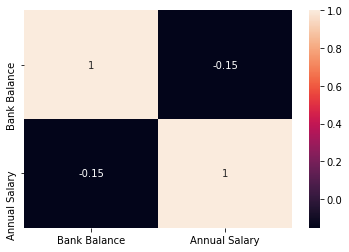

In [19]:
sns.heatmap(Default[['Bank Balance','Annual Salary']].corr(), annot = True)

In [20]:
Default.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
defaulted        0
dtype: int64

In [21]:
Q1, Q3 = Default['Bank Balance'].quantile([.25, .75])
IQR = Q3-Q1
LL = Q1 - 1.5+(IQR)
UL = Q3 + 1.5*(IQR)

In [22]:
UL

26317.965

In [23]:
df = Default[Default['Bank Balance'] > UL]

In [24]:
df

,Index,Employed,Bank Balance,Annual Salary,defaulted
173,174,0,26469.60,171257.88,1
1136,1137,1,29988.24,618051.48,1
1160,1161,0,30032.16,179370.24,1
1359,1360,1,26651.64,488701.20,1
1502,1503,0,27994.56,141242.76,1
1609,1610,0,27239.40,216253.32,1
2096,2097,0,27142.20,240362.04,1
2140,2141,0,27706.68,229323.24,0
2929,2930,0,28647.72,339562.92,1
3162,3163,0,28983.84,209154.00,1


In [25]:
df['defaulted'].count()

31

In [26]:
 Default.drop('Index' , axis =1)

,Employed,Bank Balance,Annual Salary,defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [27]:
df['defaulted'].value_counts(normalize = True)

#now we will see how much percentage of is defaulted in 31 numbers of outlyers

1    0.83871
0    0.16129
Name: defaulted, dtype: float64

In [28]:
df['defaulted'].value_counts()

1    26
0     5
Name: defaulted, dtype: int64

In [29]:
Default['Bank Balance'] = np.where(Default['Bank Balance']> UL,UL,Default['Bank Balance'])

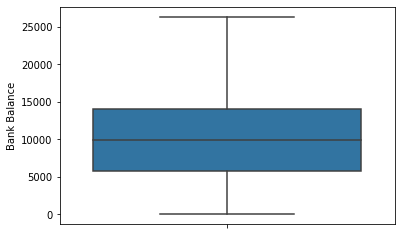

In [30]:
sns.boxplot(y = Default['Bank Balance'])
plt.show()

In [31]:
# As our column of "Employee" is already in numerical digit  so its fine .
#otherwise if its yes and no    we have to change it into 0 and 1 form


In [32]:
Default.drop('Index', axis=1, inplace = True)

In [33]:
Default.head()

,Employed,Bank Balance,Annual Salary,defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X= Default.drop('defaulted' , axis =1)
y = Default['defaulted']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3, random_state = 21, stratify = y)

In [41]:
print(x_train.shape)
print(x_test.shape)

NameError: name 'x_train' is not defined

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()

In [45]:
lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
X_test.head()

,Employed,Bank Balance,Annual Salary
1071,0,11374.68,205133.76
9106,1,13545.96,540527.28
501,0,22422.48,245875.20
6475,0,6343.08,235459.56
5943,1,14218.08,414332.28


In [48]:
lr.predict_proba(X_test)

array([[0.85513379, 0.14486621],
       [0.99514363, 0.00485637],
       [0.85610956, 0.14389044],
       ...,
       [0.97229472, 0.02770528],
       [0.88550194, 0.11449806],
       [0.98297599, 0.01702401]])